In [1]:
import os
from collections import defaultdict
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
path = "./Predictions_3_files/"
mpl.axes.titlesize=14
mpl.axes.labelsize=14

In [2]:
ppd = pd.read_csv("Predictions_3_files/all_results.tsv",sep="\t")
ppd[["col2Del","system","dataset"]] = ppd["Filename"].str.split("/",expand=True)
del ppd["col2Del"]
ppd["dataset"] = ppd["dataset"].str.replace("_final","")
ppd["dataset"] = ppd["dataset"].str.replace(".conll","")
ppd = ppd.rename(columns={"UAs":"UAS"})
ppd[ppd["Length"]<20].sort_values("Length").head(40)


,Filename,Length,Num.Sentences,UAS,LAS,system,dataset
108,./yap/Test.conll,3,160,0.908333,0.814583,yap,Test
236,./DCST/Test.conll,3,160,0.931250,0.862500,DCST,Test
44,./BiAFF/Test.conll,3,160,0.935417,0.854167,BiAFF,Test
172,./L2S/Test.conll,3,160,0.933333,0.854167,L2S,Test
0,./BiAFF/prose_final.conll,4,1,0.750000,0.500000,BiAFF,prose
86,./yap/prose.conll,4,1,0.750000,0.500000,yap,prose
109,./yap/Test.conll,4,153,0.872549,0.764706,yap,Test
45,./BiAFF/Test.conll,4,153,0.906863,0.812092,BiAFF,Test
128,./L2S/poetry.conll,4,1,0.750000,0.500000,L2S,poetry
150,./L2S/prose.conll,4,1,0.750000,0.500000,L2S,prose


In [54]:
plotPD = ppd[ppd["system"]=="BiAFF"]
plotPD = plotPD.pivot(index="Length",columns="dataset",values="Num.Sentences").fillna(0)
plotPD[8:13], plotPD[4:15]

(dataset  Test  poetry  prose
 Length                      
 11       38.0    30.0   30.0
 12       28.0    34.0   34.0
 13       21.0    32.0   32.0
 14       27.0    28.0   28.0
 15       15.0    26.0   26.0, dataset  Test  poetry  prose
 Length                      
 7        95.0    17.0   17.0
 8        57.0    19.0   19.0
 9        54.0    19.0   19.0
 10       35.0    19.0   19.0
 11       38.0    30.0   30.0
 12       28.0    34.0   34.0
 13       21.0    32.0   32.0
 14       27.0    28.0   28.0
 15       15.0    26.0   26.0
 16       10.0    15.0   15.0
 17        7.0    16.0   16.0)

In [28]:
def plotter(item,cutoff,cutLow =5, labOrNot="UAS",evaln="UAS",distPD=ppd): 
    plotPD = distPD[(distPD["dataset"] == item) & (distPD["Length"] <= cutoff) & (distPD["Length"] >= cutLow)  ][["system","Length",labOrNot]]
    plotPD = plotPD.pivot(index="Length",columns="system",values=labOrNot).fillna(0)
    ax = plotPD.plot(marker='H',title=labOrNot,xticks=(range(cutLow,20,1)),yticks = np.arange(0,1.1,0.1))
    ax.title.set_size(14)
    ax.set_ylabel(labOrNot,fontsize=14)
    ax.set_xlabel(plotPD.index.name,fontsize=14)
    plt.savefig(item+labOrNot+"Length.eps",dpi=600,bbox_inches="tight")
    

In [27]:
labOrNot = "UAS"
distPD = ppd
plotPD = distPD[(distPD["dataset"] == "poetry") & (distPD["Length"] <= 19)  ][["system","Length",labOrNot]]
plotPD = plotPD.pivot(index="Length",columns="system",values=labOrNot).fillna(0)
ax = plotPD.plot(marker='H',title=labOrNot,xticks=(range(cutLow,20,1)))

NameError: name 'cutLow' is not defined

In [80]:
plotPD.mad()

system
BiAFF    0.084023
DCST     0.121610
L2S      0.081500
yap      0.082867
dtype: float64

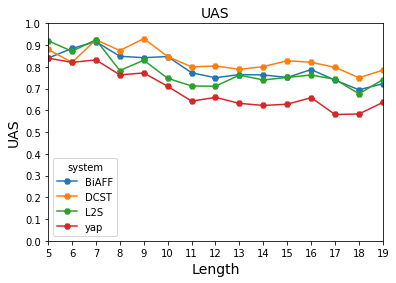

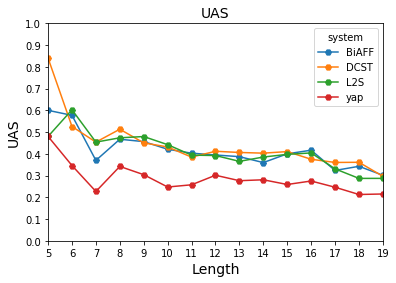

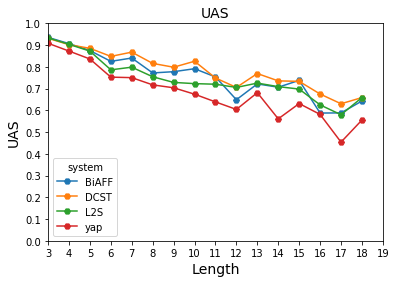

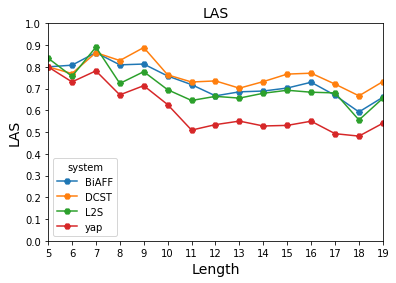

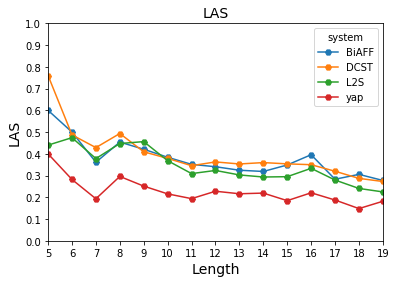

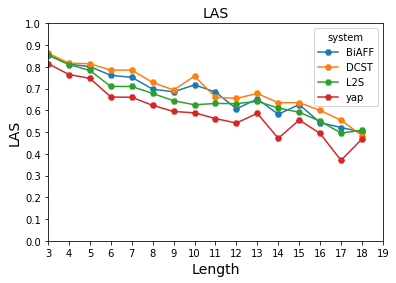

In [29]:
plotter('prose',19)
plotter('poetry',19)
plotter('Test',18,cutLow=3)
plotter('prose',19,labOrNot="LAS")
plotter('poetry',19,labOrNot="LAS")
plotter('Test',18,cutLow=3,labOrNot="LAS")

In [22]:
ppd["Filename"].str.split("/",expand=True,n=2)

,0,1,2
0,.,BiAFF,prose_final.conll
1,.,BiAFF,prose_final.conll
2,.,BiAFF,prose_final.conll
3,.,BiAFF,prose_final.conll
4,.,BiAFF,prose_final.conll
...,...,...,...
251,.,DCST,Test.conll
252,.,DCST,Test.conll
253,.,DCST,Test.conll
254,.,DCST,Test.conll
